<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML5_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Для первого примера мы возьмем датасет mtp, содержащий фармокологические данные. Этот датасет подходит для наших целей: в нем довольно много признаков, не все и которых очень показательны для значения целевой переменной.

In [2]:
df = fetch_openml("mtp", version=1)

df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


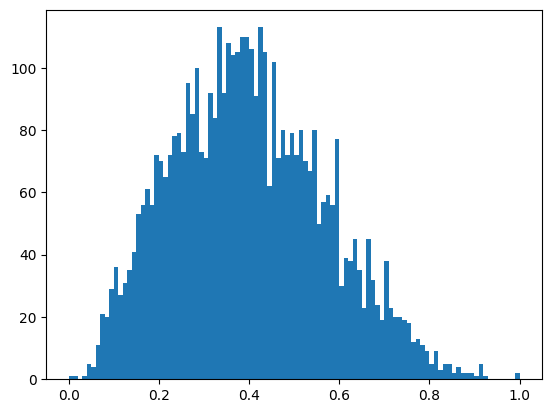

In [3]:
plt.hist(df.target, 100)
_ = plt.plot()

Мы видим, что целевая переменная представляет собой численное значение, что определяет задачу моделирования как регрессию. Кроме того, график показывает, что распределение имеет форму, сходную с нормальным

Построение базовой (baseline) модели

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

baseline = LinearRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340762242646

Базовая модель демонстрирует очень низкий уровень эффективности, хуже случайности, хуже предсказания среднего значения. Если бы мы продиагностировали ее, мы бы поняли, что проблема в очень высокой вариативности модели. Самая простая модель уже "переобучается" на наших данных. Это происходит потому, что в данных очень много признаков, каждый их которых добавляет одну степень свободы модели (добавляет один обучаемый коэффициент), что увеличивает её сложность.

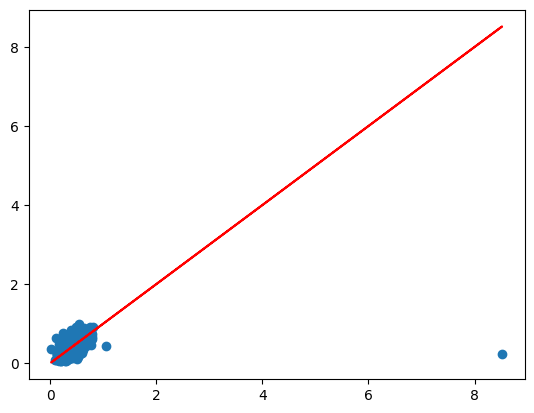

In [6]:
plt.figure()
y_pred = baseline.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_pred, c='r')
plt.show()

Определение относительной важности признаков

In [7]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Мы получим столбчатый график, на котором по вертикали отложены все наши признаки, они подписаны слева вдоль вертикальной оси, по горизонтали - отложена относительная важность данного признака. Это условное число, которое показывает, насколько информативен данный признак для предсказания значения целевой переменной

Text(0.5, 0, 'Feature Importance')

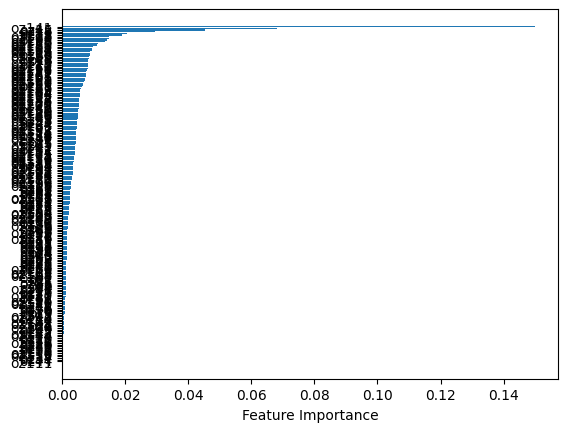

In [8]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [9]:
rf.feature_importances_[sort][-10:]

array([0.01354116, 0.01427937, 0.01485956, 0.01486562, 0.01891106,
       0.0204779 , 0.02953755, 0.04540764, 0.06799489, 0.14983382])

In [10]:
df.data.columns[sort][-10:]

Index(['oz137', 'oz198', 'oz20', 'oz197', 'oz112', 'oz18', 'oz35', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

Теперь мы можем использовать эту информацию для удаления лишних данных из датасета. Количество самых важных признаков мы выбираем сами. Зачастую для этого используют "метод локтя". Можете самостоятельно попробовать разное количество признаков, мы сейчас возьмем 20

In [11]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz8,oz159,oz155,oz60,oz179,oz162,oz154,oz161,oz158,oz180,oz137,oz198,oz20,oz197,oz112,oz18,oz35,oz48,oz15,oz141
0,0.060606,0.929724,0.752291,0.008905,0.025609,0.319206,0.030205,0.382067,0.800120,0.002655,0.000000,0.039213,0.000000,0.505899,0.000000,0.0625,0.0,0.312855,0.000000,0.041308
1,0.373737,0.944542,0.745984,0.107726,0.024601,0.306084,0.016908,0.383458,0.791224,0.002581,0.278945,0.326584,0.242424,0.683820,0.222222,0.0625,0.4,0.297041,0.282828,0.212274
2,0.212121,0.946121,0.753298,0.067220,0.025104,0.406309,0.006922,0.382596,0.798276,0.002722,0.000000,0.204885,0.388889,0.499219,0.000000,0.1250,0.0,0.288557,0.388889,0.063643
3,0.171717,0.945087,0.767469,0.058315,0.025280,0.327848,0.001240,0.382776,0.800965,0.002473,0.039437,0.023469,0.095238,0.630533,0.000000,0.0000,0.1,0.310692,0.111111,0.031193
4,0.101010,0.941644,0.741548,0.017809,0.024934,0.329857,0.011829,0.383539,0.802893,0.002810,0.000000,0.111398,0.260870,0.516053,0.000000,0.0625,0.0,0.286581,0.304348,0.063643


In [12]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.37739931124475823

Мы используем тот же класс моделей - линейную регрессию - чтобы различия в метрике были сопоставимы. И мы получаем гораздо более качественную модель. Метрика уже положительна, что свидетельствует о большом росте точности

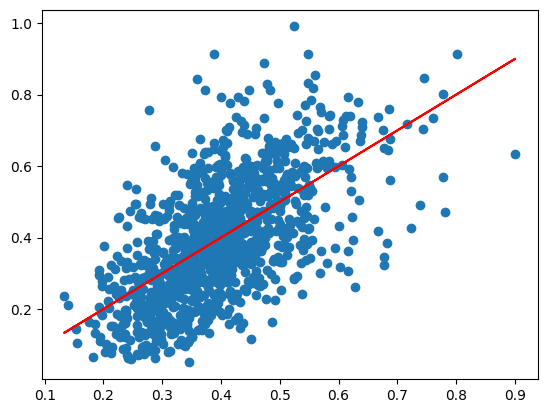

In [13]:
plt.figure()
y_pred = better.predict(X_test)
plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_pred, c='r')
plt.show()

Автоматизация отбора признаков

In [14]:
df.data.shape

(4450, 202)

In [15]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(RandomForestRegressor(n_estimators=15)).fit(df.data, df.target)
X_trimmed = sfm.transform(df.data)
X_trimmed.shape

(4450, 53)

Видим еще большее улучшение по метрикам

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_trimmed, df.target, test_size=0.25, random_state=42)

better = LinearRegression()
better.fit(X_train, y_train)

print(bl_score)
better.score(X_test, y_test)

-1.6511340762242646


0.44197330866993934

Устранение дисбаланса классов

Одна из самых частых проблем при построении моделей классификации на реальных данных - дисбаланс классов. Это ситуация, когда в датасете присутствует очень разное количество объектов, принадлежащих разным классам.

In [17]:
df = fetch_openml("balance-scale", version=1)

df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


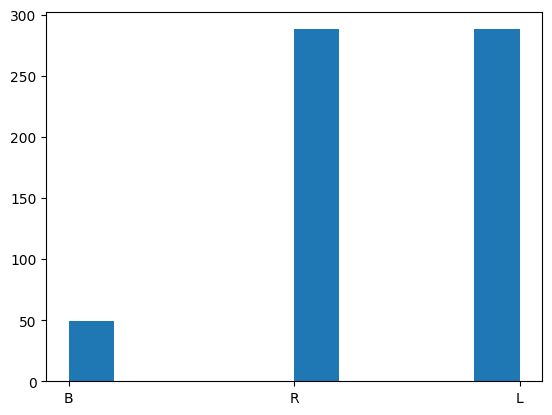

In [18]:
plt.hist(df.target, 10)
_ = plt.plot()

Мы видим, что объекты объединены в три класса, называемые "B", "R" и "L". Причем, объектов класса "B" примерно в шесть раз меньше, чем каждого из двух других. Это - миноритарный класс, а два других - мажоритарные.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

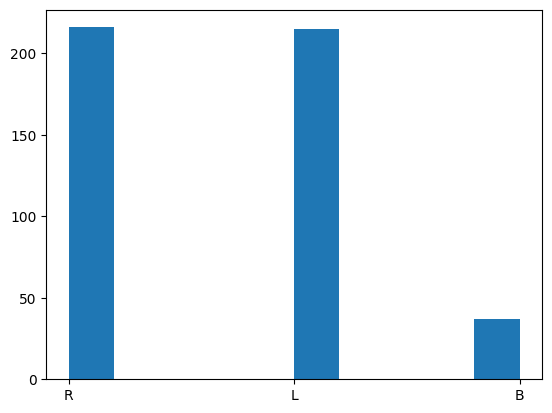

In [20]:
plt.hist(y_train, 10)
_ = plt.plot()

Базовая модель дает примерно 86% точности

In [21]:
from sklearn.linear_model import LogisticRegression

baseline = LogisticRegression()
baseline.fit(X_train, y_train)
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



In [23]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


Фактически, модель вообще ни разу не распознала правильно объект миноритарного класса. Поэтому невзвешенная оценка качества модели на самом деле ближе к отметке в 60%

Главная проблема дисбаланса классов в том, что модель недостаточно учитывает объекты миноритарных классов. Можно относительно просто это исправить, при обучении модели, придав больший "вес" таким редким объектам.

In [24]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [25]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

Мы видим, что точность модели возросла с 86% до 92%. Это очень существенное увеличение эффективности. Причем обратите внимание, что оценивали модель мы на той же тестовой выборке, в которой сохранено исходной неравномерное распределение. То есть это естественное повышение качества.

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



Oversampling

In [27]:
y_train.value_counts()

,count
class,
R,216
L,215
B,37


In [28]:
X_train["target"] = y_train
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


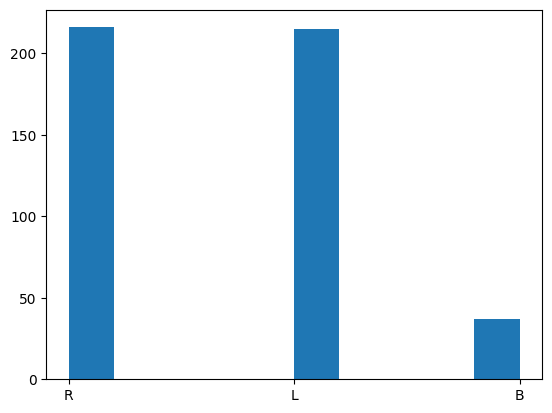

In [29]:
plt.hist(X_train["target"], 10)
_ = plt.plot()

Мы просто добавили в обучающую выборку дубликаты объектов миноритарного класса в нужном объеме. В итоге, по задумке этого метода, при обучении модель будет чаще видеть такие объекты (пусть одни и те же) и будет подстраивать свои веса под них в том же темпе, что и под объекты мажоритарных классов.

In [30]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [31]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, OSmodel.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



При оценке качества этой модели получаем такую же картину, что и после взвешивания

Дискретизация целевой переменной

In [33]:
df = fetch_openml("CPMP-2015-regression", version=1)
df.data.drop(["instance_id"], inplace=True, axis=1)
df.data = pd.get_dummies(df.data)
df.data.head()

<ipython-input-33-fe69465c1096>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.data.drop(["instance_id"], inplace=True, axis=1)


,repetition,stacks,tiers,stack.tier.ratio,container.density,empty.stack.pct,overstowing.stack.pct,overstowing.2cont.stack.pct,group.same.min,group.same.max,...,avg.l1.top.left.lg.group,cont.empty.grt.estack,pct.bottom.pct.on.top,algorithm_astar.symmulgt.transmul,algorithm_astar.symmullt.transmul,algorithm_idastar.symmulgt.transmul,algorithm_idastar.symmullt.transmul,runstatus_memout,runstatus_ok,runstatus_timeout
0,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,True,False,False,False,False,True,False
1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,True,False,False,False,True,False
2,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,True,False,False,True,False
3,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,0,6,...,0.509615,0.1750,0.0,False,False,False,True,False,False,True
4,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,0,7,...,0.663462,0.3375,0.0,True,False,False,False,True,False,False


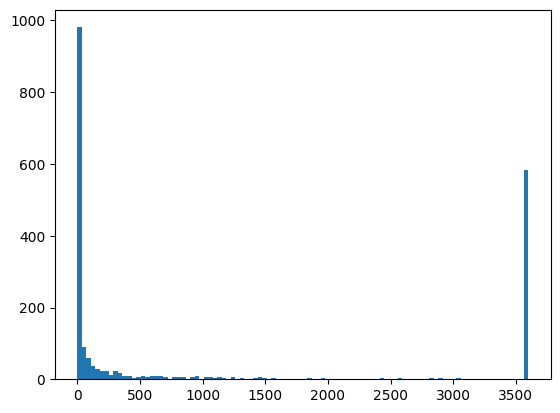

In [34]:
plt.hist(df.target, 100)
_ = plt.plot()

Мы видим, что целевая переменная имеет численный вид (то есть перед нами проблема регрессии), и при этом, распределена очень неравномерно

In [35]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

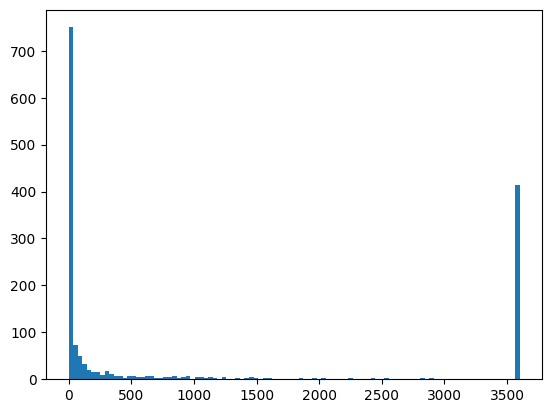

In [36]:
plt.hist(y_train, 100)
_ = plt.plot()

Дискретизацию целевой переменной. Этот способ заключается в том, что мы объединяем значения целевой переменной в категории - bins - поэтому такой способ часто называют биннинг.

In [37]:
from sklearn.preprocessing import KBinsDiscretizer

y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform").fit_transform(pd.DataFrame(y_train))
y_binned

array([[4.],
       [0.],
       [4.],
       ...,
       [0.],
       [0.],
       [4.]])

Группировка объектов означает, что мы переходим к категориальному типу в целевой переменной. Каждая категория будет обозначать некоторый диапазон исходных значений. При этом категории нумеруются последовательно, как при применении OrdinalEncoder при кодировании категориальных признаков.

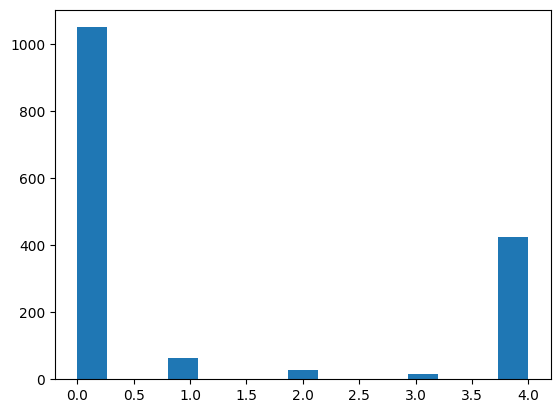

In [38]:
plt.hist(y_binned, 15)
_ = plt.plot()

Естественно, так как мы используем равномерные диапазоны, в крайних поддиапазонах соберутся большинство объектов выборки. Мы это видим на графике - столбцы укрупнились, но неравномерность распределения никуда не делась. В случае таких сильно неравномерных распределений нам больше подойдет другая стратегия - квантильная дискретизация, при которой длина диапазонов выбирается таким образом, чтобы в каждом из них оказалось примерно по одинаковому количеству объектов выборки

In [41]:
y_binned = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile").fit_transform(pd.DataFrame(y_train))

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


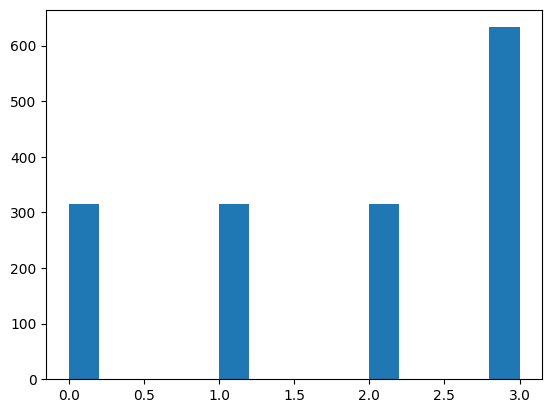

In [40]:
plt.hist(y_binned, 15)
_ = plt.plot()